# RRevolution verification

**Motivation:** I just reworked some of my framework to streamline things a bit more, but since this is the first time that I'm checking how thing are working w/ my new repo setup, my first step is just to *sanity check* the pipeline with the new setup.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import yaml

import matplotlib.pyplot as plt
from matplotlib import gridspec
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler

import os
os.sys.path.append('../RRevolution/code/')
from utils import getSubDir


# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Step 1:** Draw the loss curves

In [2]:
physicsSample = 'SMNR'
prodTag = 'JUN20'
mc_tr = 'mc16ade'
nSelectedJets = 5

config = 'test'
num_folds = 2

In [3]:
trainDir = getSubDir(physicsSample, mc_tr, prodTag, nSelectedJets)

In [4]:
mdict = []

for k in range(num_folds):
    
    filename = f'../RRevolution/pairingMVAs/models/{trainDir}/{config}_{k+1}of{num_folds}/loss_acc.json'
    with open(filename) as vfile:
        metrics = json.load(vfile)
        mdict.append(metrics)

In [5]:
mdict[0]

{'train_loss': [4.954729309305549,
  4.529745755717158,
  4.365644359961152,
  4.254548875615001,
  4.140676539391279,
  4.060750974342227,
  3.9815680515021086,
  3.8605160005390644,
  3.797737453132868,
  3.7187330070883036,
  3.679653577506542,
  3.663004755973816,
  3.680997332558036,
  3.5910787042230368,
  3.587226189672947,
  3.537116814404726,
  3.5231482479721308,
  3.513318181037903,
  3.497314067557454,
  3.46261453256011,
  3.469720436260104,
  3.429994637146592,
  3.4409044180065393,
  3.4225799422711134,
  3.398619059473276,
  3.3872755710035563,
  3.366356609389186,
  3.360146339982748,
  3.3387214364483953,
  3.338157871738076,
  3.298843045718968,
  3.3048902666196227,
  3.2957652183249593,
  3.2594099016860127,
  3.2427542861551046,
  3.249745551496744,
  3.2242795107886195,
  3.232253571972251,
  3.2258463092148304,
  3.2244323268532753,
  3.2093747658655047,
  3.198124456219375,
  3.1863236473873258,
  3.1823434829711914,
  3.1919621666893363,
  3.209970787167549,
 

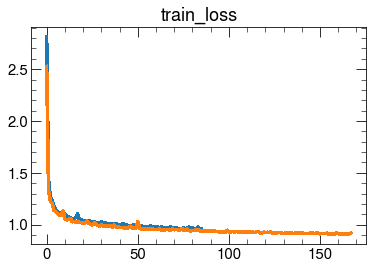

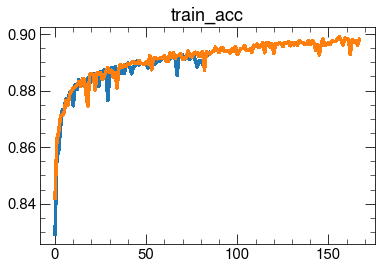

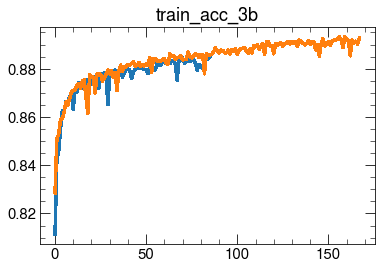

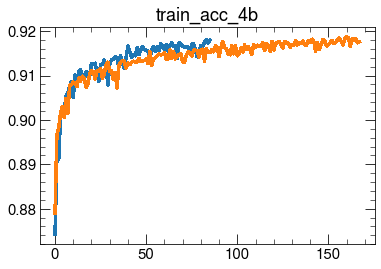

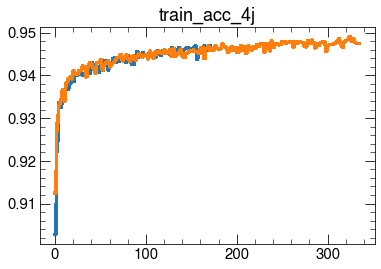

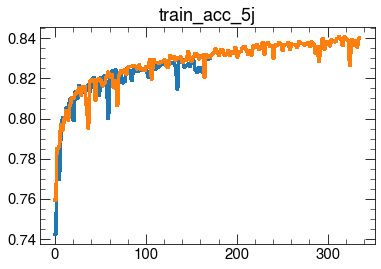

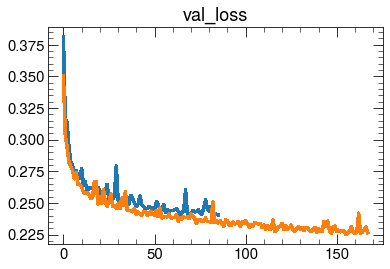

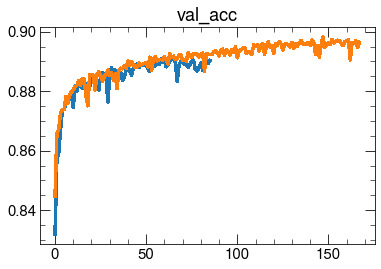

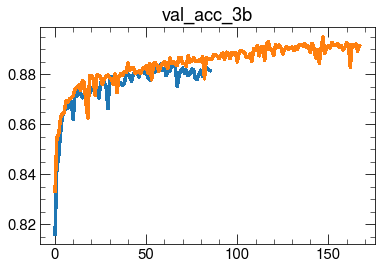

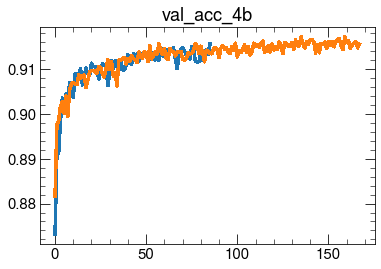

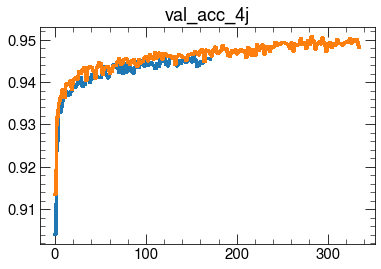

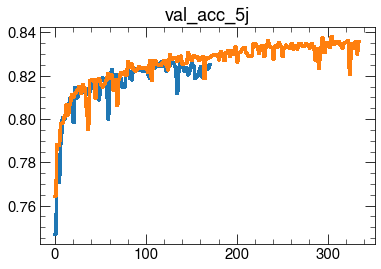

In [5]:
for k in metrics.keys():
    plt.figure()
    plt.plot(mdict[0][k])
    plt.plot(mdict[1][k])
    plt.title(k)

Ok, so when I showed this to Sean, he said (and I think I agree) that it *doesn't* seem like the models are done training.

**Ideas:**
- Increase the patience (again)
- Stop using the validation *loss* instead of the validation accuracy
- Different games w/ the learning rate?56789

Also, why are there like 400 epochs getting saved here when there are only like ~ 200 models getting saved in the directories??

In [6]:
with open('../pairAGraphTraining/configs/test.yaml', 'r') as yaml_file:
    configDict = yaml.load(yaml_file, Loader=yaml.FullLoader)

In [8]:
configDict

{'dataset': {'physicsSample': 'SMNR',
  'mc': 'mc16ade',
  'prodTag': 'JUN20',
  'nSelectedJets': 5,
  'sort': 'Db',
  'jetVars': ['pt', 'eta', 'phi', 'E', 'Db'],
  'batch_size': 2048},
 'model': 'pairAGraph',
 'modelParams': {'nLayers': 1,
  'embed_dim': 20,
  'ff_dim': 20,
  'nHeads': 4,
  'p': 0.3},
 'training': {'lr': 0.005, 'nEpochs': 500, 'patience': 20}}

In [7]:
from utils import fileDirSLAC as fileDir, mcToYr,L
from analysis import pairAndProcess,processDf,mva,applyCuts
from analysis import allPairs,min_dR1,MDR_minDhh,getHCs_4jets,truthInfo
from processMNTs import normalizeWeight

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
jVars = ['pt','eta','phi','E']

In [11]:
i_jvc = jVars.index('jvc') if 'jvc' in jVars else None

In [10]:
files_mc16a = glob(fileDir[f'{physicsSample}_mc16a-JUN20']+'*.root')
assert len(files_mc16a) == 1
mc16a_file = files_mc16a[0]

In [13]:
# df = pairAndProcess(mc16a_file,3,'pairAGraph',configDict['training'], 
#                     configDict['modelParams'], num_folds, physicsSample=physicsSample, 
#                     prodTag=prodTag, year=mcToYr['mc16a'], sort='Quantile_DL1r_Continuous',
#                     nSelectedJets=5, pT_min=40, truth=True, HC_ordering='scalar_pt')

In [11]:
df = processDf(mc16a_file, nJetsMax=nSelectedJets, pT_min=40, year=2016,
               hashFile='../RRevolution/code/hashMap.json')


Opening /gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_FullTop.MC16a-2015-2016.AB21.2.91-JUN20-1.full_MiniNTuple.root/user.valentem.22740909._000001.MiniNTuple.root
Loading in the event df
Running on mc
Loading in the jet array
Sorting selected jets by Quantile_DL1r_Continuous
  Jet sfs for evts with 4 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 6 resolved jets
  Jet sfs for evts with 5 selected jets out of 6 resolved jets
  Jet sfs for evts with 6 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selected jets out of 7 resolved jets
  Jet sfs for evts with 5 selected jets out of 7 resolved jets
  Jet sfs for evts with 6 selected jets out of 7 resolved jets
  Jet sfs for evts with 7 selected jets out of 7 resolved jets
  Jet sfs for evts with 4 selected jets out of 8 res

In [12]:
ntag = 3

# Apply 4-jets, trigger and b-tagging cuts
if ntag == 2:
    bmask = (df.ntag == ntag) 
else:
    bmask = (df.ntag >= ntag) 
df = df[(df.njets>=4) & bmask & df.trigger]



In [13]:
HC1,HC2,ja0,ja1,jb0,jb1 = mva(df,'pairAGraph',configDict['dataset'], configDict['modelParams'],'test',2,'scalar_pt')

['pt', 'eta', 'phi', 'E', 'Db']
Scaling pt.
Scaling E.
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es


In [14]:
df[['ntag','ntag_pag']]

ntag  ntag_pag
entry                 
3        3.0         3
7        3.0         3
8        4.0         4
9        3.0         3
12       3.0         3
...      ...       ...
686676   3.0         3
686688   3.0         3
686691   3.0         3
686695   4.0         4
686705   4.0         4

[203346 rows x 2 columns]

In [15]:
applyCuts(df,HC1,HC2,ja0,ja1,jb0,jb1)

Calculating Xhh


In [16]:
df

eventNumber  nresolvedJets  weight_pileup  mcEventWeight  rand_run_nr  \
entry                                                                           
3            286535              5       1.097209       0.031172       305543   
7            285372              5       0.882703       0.031172       311365   
8            286268              8       0.874719       0.031172       306269   
9            286648              5       0.837192       0.031172       301973   
12           285290              6       0.837192       0.031172       302137   
...             ...            ...            ...            ...          ...   
686676      1226285              5       1.081466       0.031172       303560   
686688      1225825              6       1.081466       0.031172       303208   
686691      1225206              6       1.114303       0.031172       303338   
686695      1225400              4       0.870893       0.031172       306278   
686705      1225504              5       0.986015       0.031732       303943   

             j0_pt    j0_eta    j0_phi        j0_E  j0_btag  ...        Xhh  \
entry                                                        ...              
3       324.497467  1.056266 -2.457010  526.199890        1  ...   1.553641   
7        90.420914 -0.478221  0.800705  101.461746        1  ...   0.709754   
8       120.845940  0.708957  0.512131  153.004074        1  ...   0.622954   
9       103.905296  1.473665 -1.613765  238.963760        1  ...   0.763951   
12      137.604263  0.972510  2.896851  208.353516        1  ...   3.719885   
...            ...       ...       ...         ...      ...  ...        ...   
686676  112.876747  0.136010 -2.021988  114.282440        1  ...   2.780055   
686688  111.726906 -0.011862 -3.121325  112.402748        1  ...   5.974644   
686691  210.179031 -0.125038  0.654545  212.440659        1  ...  11.114846   
686695  183.472244 -1.248099 -3.082982  346.423065        1  ...   1.296632   
686705  306.238464 -0.207594  1.117506  315.066925        1  ...   0.922462   

        kinematic_region        pT_2        pT_4     eta_i    dRjj_1  \
entry                                                                  
3                      0  266.255554   51.429001  0.812823  0.604275   
7                      0   90.420914   60.735657  1.029900  1.459777   
8                      0  120.845940   75.861893  0.791123  0.931950   
9                      0  103.905296   48.947235  1.565973  1.411905   
12                     3  137.604263   57.026417  1.762201  1.409350   
...                  ...         ...         ...       ...       ...   
686676                 2   94.659370   65.984749  0.571272  0.924269   
686688                 3  108.880783   98.968117  0.631876  0.772119   
686691                 3  104.817368   43.127853  0.328884  0.625348   
686695                 0   95.395836   47.333122  1.311762  1.310535   
686705                 0  271.059998  101.047836  0.816301  0.631233   

          dRjj_2          HT  cosThetaStar  event_number  
entry                                                     
3       0.648715  705.844494      0.370744        286535  
7       1.535984  328.495583     -0.654351        285372  
8       1.134809  461.387711      0.356136        286268  
9       1.514777  366.748444      0.000916        286648  
12      1.993254  412.640030      0.361940        285290  
...          ...         ...           ...           ...  
686676  2.196027  355.801331      0.448148       1226285  
686688  1.624731  423.047836      0.164545       1225825  
686691  2.933813  413.645081     -0.329689       1225206  
686695  1.358996  381.032520      0.373946       1225400  
686705  0.672321  780.764816      0.611682       1225504  

[203346 rows x 184 columns]

In [17]:
mask = (df.ntag >=4) & df.cut_deta_hh & df.cut_Xwt & (df.kinematic_region==0)

In [18]:
np.sum(df.loc[mask,'mc_sf'])

674.6438641025917

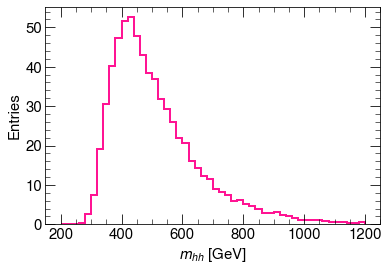

In [19]:
plt.hist(df.loc[mask,'m_hh'],50,(200,1200),histtype='step',lw=2,
         color='deeppink',weights=df.loc[mask,'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.show()

Alright - so it's nice that I have this, but the thing is I need some baselines to see if it's loading in the things ok...

I could:
1. Compare to old trainings
2. Compare to $\min \Delta R_{jj}^{HC1}$

In [20]:
df2 = df.copy()

allPairs(df2,'pt')

pair 0: (0, 1) (2, 3)
pair 1: (0, 2) (1, 3)
pair 2: (0, 3) (1, 2)


In [21]:
min_dR1(df2)
HC1,HC2,ja0,ja1,jb0,jb1 = getHCs_4jets(df2) 
applyCuts(df2,HC1,HC2,ja0,ja1,jb0,jb1)

Calculating Xhh


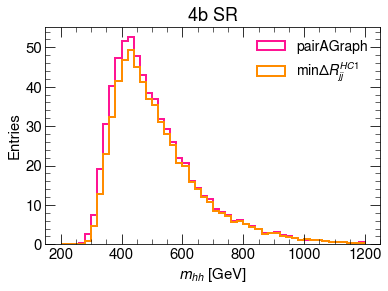

In [22]:
m2 = (df2.ntag >=4) & df2.cut_deta_hh & df2.cut_Xwt & (df2.kinematic_region==0)
plt.hist(df.loc[mask,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='pairAGraph',color='deeppink',
         weights=df.loc[mask,'mc_sf'])
plt.hist(df2.loc[m2,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='$\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=df2.loc[m2,'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('4b SR')
plt.show()

Perfect... this looks trained to me!

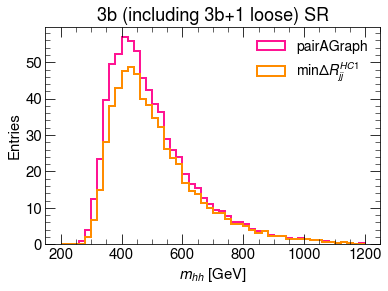

In [23]:
mask = (df.ntag ==3) & df.cut_deta_hh & df.cut_Xwt & (df.kinematic_region==0)
m2 = (df2.ntag ==3) & df2.cut_deta_hh & df2.cut_Xwt & (df2.kinematic_region==0)
plt.hist(df.loc[mask,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='pairAGraph',color='deeppink',
         weights=df.loc[mask,'mc_sf'])
plt.hist(df2.loc[m2,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='$\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=df2.loc[m2,'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('3b (including 3b+1 loose) SR')
plt.show()

Maybe I should split this up by 3b + 1 loose and 3b?

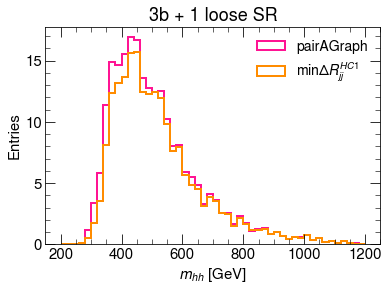

In [24]:
mask = (df.ntag ==3) & (df.j3_Db==2) & df.cut_deta_hh & df.cut_Xwt & (df.kinematic_region==0)
m2 = (df2.ntag ==3) & (df2.j3_Db==2) & df2.cut_deta_hh & df2.cut_Xwt & (df2.kinematic_region==0)
plt.hist(df.loc[mask,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='pairAGraph',color='deeppink',
         weights=df.loc[mask,'mc_sf'])
plt.hist(df2.loc[m2,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='$\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=df2.loc[m2,'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('3b + 1 loose SR')
plt.show()

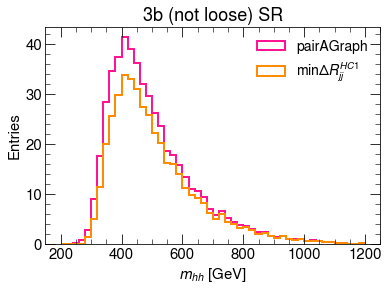

In [25]:
mask = (df.ntag ==3) & (df.j3_Db==1) & df.cut_deta_hh & df.cut_Xwt & (df.kinematic_region==0)
m2 = (df2.ntag ==3) & (df2.j3_Db==1) & df2.cut_deta_hh & df2.cut_Xwt & (df2.kinematic_region==0)
plt.hist(df.loc[mask,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='pairAGraph',color='deeppink',
         weights=df.loc[mask,'mc_sf'])
plt.hist(df2.loc[m2,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='$\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=df2.loc[m2,'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('3b (not loose) SR')
plt.show()

Ok - this is *super* cool honestly!!

If the 3b not loose SR is so overwhelming the 3b + 1 loose category, I'm honestly a *little* skeptical of Todd's claim that pairAGraph is doing the same thing as 3b.

**Is there anything else we'd like to look at as a sanity check?**

Maybe comparing the pairing accurcies with and w/o the correct pair existing?

In [26]:
pag_mask = df.trigger 

for m in [df.ntag >=4,df.cut_deta_hh, df.cut_Xwt, (df.kinematic_region==0)]:
    
    pag_mask = m & pag_mask
    num = np.sum(df.loc[pag_mask&(df.chosenPair==df.correctPair),'mc_sf'])
    den = np.sum(df.loc[pag_mask,'mc_sf'])
    
    print(100 * num / den)

76.82421321530413
77.92216083255678
81.39944327201471
93.82269959272841


In [27]:
pag_mask = df.trigger & (df.correctPair != -1)

for m in [df.ntag >=4,df.cut_deta_hh, df.cut_Xwt, (df.kinematic_region==0)]:
    
    pag_mask = m & pag_mask
    num = np.sum(df.loc[pag_mask&(df.chosenPair==df.correctPair),'mc_sf'])
    den = np.sum(df.loc[pag_mask,'mc_sf'])
    
    print(100 * num / den)

92.48040187442464
92.66969813278342
94.67539392033305
98.44531395486344


In [49]:
n_4j = np.sum((df.correctPair != -1) & (df.njets==4))
n_5j = np.sum((df.correctPair != -1) & (df.njets>=5))

In [50]:
(n_4j /3 + n_5j/15) / (n_4j + n_5j)

0.20280190790488412

In [51]:
df.loc[df.njets==4,'chosenPair'].max()

2.0

In [ ]:
df.loc[df.correctPair!=-1,['chosenPair','correctPair']]

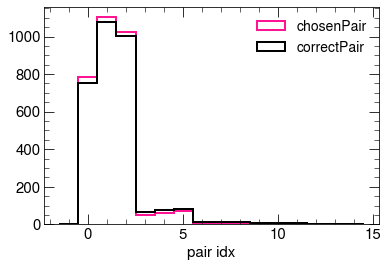

In [28]:
plt.hist(df.loc[df.correctPair!=-1,'chosenPair'],16,(-1.5,14.5),color='deeppink',
         histtype='step',lw=2,weights=df.loc[df.correctPair!=-1,'mc_sf'],label='chosenPair')
plt.hist(df.loc[df.correctPair!=-1,'correctPair'],16,(-1.5,14.5),color='k',
         histtype='step',lw=2,weights=df.loc[df.correctPair!=-1,'mc_sf'],label='correctPair')
plt.xlabel('pair idx')
plt.legend()

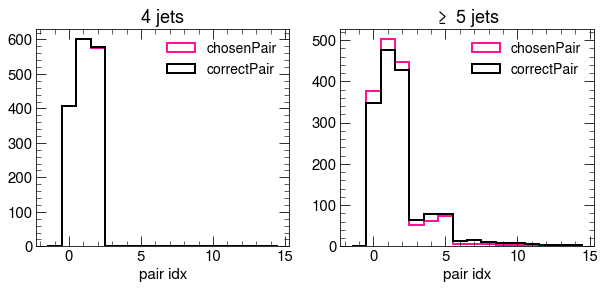

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.hist(df.loc[(df.correctPair!=-1) & (df.njets==4),'chosenPair'],
         16,(-1.5,14.5),histtype='step',lw=2,color='deeppink',label='chosenPair',
         weights=df.loc[(df.correctPair!=-1) & (df.njets==4),'mc_sf'])
ax1.hist(df.loc[(df.correctPair!=-1) & (df.njets==4),'correctPair'],
         16,(-1.5,14.5),histtype='step',lw=2,color='k',label='correctPair',
         weights=df.loc[(df.correctPair!=-1) & (df.njets==4),'mc_sf'])
ax1.set_xlabel('pair idx')
ax1.legend()
ax1.set_title('4 jets')

ax2.hist(df.loc[(df.correctPair!=-1) & (df.njets>=nSelectedJets),'chosenPair'],
         16,(-1.5,14.5),color='deeppink',histtype='step',lw=2,label='chosenPair',
         weights=df.loc[(df.correctPair!=-1) & (df.njets>=nSelectedJets),'mc_sf'])
ax2.hist(df.loc[(df.correctPair!=-1) & (df.njets>=nSelectedJets),'correctPair'],
         16,(-1.5,14.5),color='k',histtype='step',lw=2,label='correctPair',
         weights=df.loc[(df.correctPair!=-1) & (df.njets>=nSelectedJets),'mc_sf'])
ax2.set_xlabel('pair idx')
ax2.legend()
ax2.set_title('$\geq$ 5 jets')
plt.show()

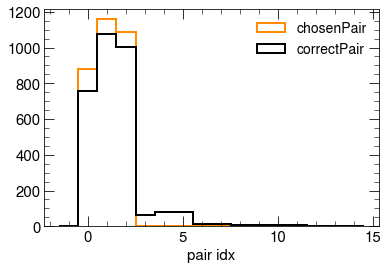

In [30]:
plt.hist(df2.loc[df2.correctPair!=-1,'chosenPair'],16,(-1.5,14.5),color='darkorange',
         histtype='step',lw=2,weights=df2.loc[df2.correctPair!=-1,'mc_sf'],label='chosenPair')
plt.hist(df2.loc[df2.correctPair!=-1,'correctPair'],16,(-1.5,14.5),color='k',
         histtype='step',lw=2,weights=df2.loc[df2.correctPair!=-1,'mc_sf'],label='correctPair')
plt.xlabel('pair idx')
plt.legend()

Ok, since the distribution is so uniform, rn I'm starting to get a little curious if I'm even loading in the model appropriately rn.

In [44]:
df_4j = pd.read_hdf('../data/SMNR_mc16ade-JUN20-5jets/df_2b_Db_sort_correct.h5','df_4j')
df_5j = pd.read_hdf('../data/SMNR_mc16ade-JUN20-5jets/df_2b_Db_sort_correct.h5','df_5j')

In [35]:
df_4j

njets  ntag     mc_sf  eventNumber  trigger  mcEventWeight  \
entry                                                               
7          4   3.0  0.026939       285372     True       0.031172   
9          4   3.0  0.028540       286648     True       0.031172   
19         4   3.0  0.038974       285097     True       0.031172   
39         4   3.0  0.038232       285509     True       0.031172   
49         4   4.0  0.040389       285153     True       0.031172   
...      ...   ...       ...          ...      ...            ...   
87643      4   4.0 -0.037149      7502313     True      -0.031172   
87646      4   4.0  0.037687      7503276     True       0.031172   
87647      4   4.0 -0.063366      7502963     True      -0.049163   
87652      4   3.0  0.005116      7503154     True       0.031172   
87660      4   3.0  0.000069      7503714     True       0.031172   

       correctPair  ml_jpt_0  ml_jeta_0  ml_jphi_0  ...  ml_jbtag_2  ml_jDb_2  \
entry                                               ...                         
7                0  0.191909  -0.478221   0.800705  ...         0.5       1.0   
9                1  0.390033   1.473665  -1.613765  ...         0.5       1.0   
19               0  0.635448  -0.230736  -2.948301  ...         0.5       2.0   
39               2  0.816321   1.565629  -2.459176  ...         0.5       1.0   
49               2  1.246727   0.319021  -0.010513  ...         0.5       2.0   
...            ...       ...        ...        ...  ...         ...       ...   
87643            2  1.587790   0.837398   2.108472  ...         0.5       2.0   
87646            1  0.120753  -1.309258   0.968439  ...         0.5       2.0   
87647            1  0.667705  -0.551356   2.919874  ...         0.5       2.0   
87652            1  0.759016  -0.104779  -2.814709  ...         0.5       1.0   
87660            2  0.789876  -1.277964   2.219267  ...         0.5       2.0   

       ml_jjvc_2  ml_jpt_3  ml_jeta_3  ml_jphi_3   ml_jE_3  ml_jbtag_3  \
entry                                                                    
7      -0.906960  0.331164   1.240486  -2.819845  0.489620        -0.5   
9      -0.764099  0.766719   1.120742   2.060469  0.789442        -0.5   
19     -0.202503  0.273847  -0.018682   0.100800 -0.447460        -0.5   
39     -1.583491 -0.769113   0.432729  -2.460884 -1.378871        -0.5   
49      0.757229 -0.593149  -0.288248   0.977085 -1.344406         0.5   
...          ...       ...        ...        ...       ...         ...   
87643  -1.051087  0.725406   1.441430   2.087516  1.067519         0.5   
87646  -1.007629 -0.350415  -0.995078   2.705838 -0.355245         0.5   
87647  -0.346133  0.442239  -0.657833   0.089486  0.034262         0.5   
87652  -1.640909  1.092584   0.014630   0.061105  0.514701        -0.5   
87660  -1.771858  0.336538   0.417150  -2.075673 -0.244759        -0.5   

       ml_jDb_3  ml_jjvc_3  
entry                       
7          -2.0  -0.828413  
9          -1.0  -0.098718  
19         -1.0   1.670791  
39         -1.0  -0.298695  
49          2.0  -0.764099  
...         ...        ...  
87643       2.0   0.859941  
87646       2.0   0.339503  
87647       1.0  -2.339382  
87652      -2.0  -0.693373  
87660      -2.0  -0.056580  

[312006 rows x 35 columns]

Oops - it looks like I might have found the problem - it looks like maybe I messed up the jet and variable indices?

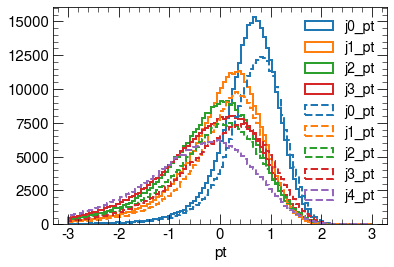

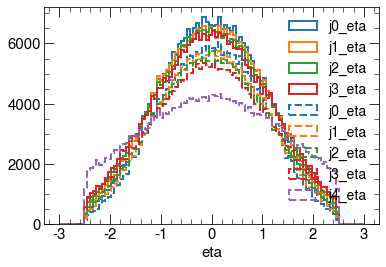

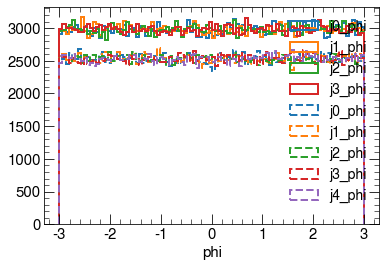

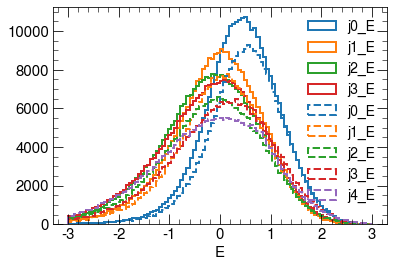

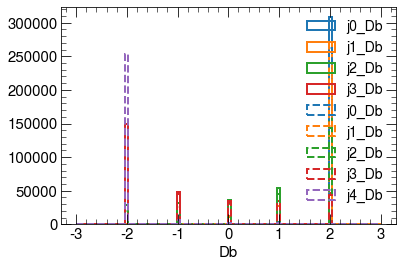

In [46]:
for v in ['pt','eta','phi','E','Db']:

    plt.figure()
    for i in range(4):
        plt.hist(df_4j[f'ml_j{i}_{v}'],100,(-3,3),histtype='step',lw=2,label=f'j{i}_{v}',color=f'C{i}')
    for i in range(nSelectedJets):
        plt.hist(df_5j[f'ml_j{i}_{v}'],100,(-3,3),histtype='step',lw=2,ls='--',
                 label=f'j{i}_{v}',color=f'C{i}')


    plt.xlabel(v)
    plt.legend()
    plt.show()

KK, I h

In [ ]:
np.max(df.correctPair)

In [33]:
mindR1_mask = df2.trigger 

for m in [df2.ntag >=4,df2.MDpT,df2.cut_deta_hh, df2.cut_Xwt, (df2.kinematic_region==0)]:
    
    mindR1_mask = m & mindR1_mask
    num = np.sum(df.loc[mindR1_mask&(df2.chosenPair==df2.correctPair),'mc_sf'])
    den = np.sum(df.loc[mindR1_mask,'mc_sf'])
    
    print(100 * num / den)

69.28291454370982
73.0331735463612
73.41783058481829
77.94416433473768
94.50291217933444


In [34]:
mindR1_mask = df2.trigger 

for m in [df2.ntag >=4,df2.MDpT,df2.cut_deta_hh, df2.cut_Xwt, (df2.kinematic_region==0)]:
    
    mindR1_mask = m & mindR1_mask
    num = np.sum(df.loc[mindR1_mask&(df2.chosenPair==df2.correctPair),'mc_sf'])
    den = np.sum(df.loc[mindR1_mask,'mc_sf'])
    
    print(100 * num / den)

69.28291454370982
73.0331735463612
73.41783058481829
77.94416433473768
94.50291217933444


In [35]:
mindR1_mask = (df2.correctPair>= 0) & (df2.correctPair<=2) 

for m in [df2.ntag >=4,df2.MDpT,df2.cut_deta_hh, df2.cut_Xwt, (df2.kinematic_region==0)]:
    
    mindR1_mask = m & mindR1_mask
    num = np.sum(df.loc[mindR1_mask&(df2.chosenPair==df2.correctPair),'mc_sf'])
    den = np.sum(df.loc[mindR1_mask,'mc_sf'])
    
    print(100 * num / den)

87.68839060698232
89.65566062573414
89.71013260023228
92.2613939119616
99.14018495499465


Somthing *has* to be up - the accuracies are seriously lower than they were before, and I have *no* idea haha.

The accuracies where the correct pair exists make sense, but I'm *not* sure about the others...

I'll load in the other df to make these comparisons easier :)

In [36]:
dr1 = pd.read_hdf('../data/SMNR_mc16a_PFlow-APR2020/df_min_dR1_3b.h5','df')

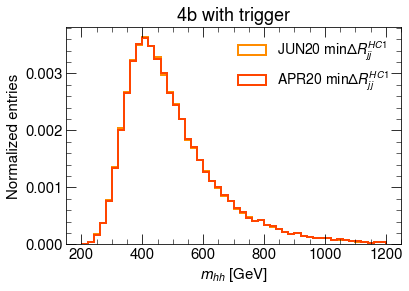

In [37]:
# m2 = (df2.ntag >=4) & df2.cut_deta_hh & df2.cut_Xwt & (df2.kinematic_region==0)
# plt.hist(df.loc[mask,'m_hh'],50,(200,1200),histtype='step',lw=2,
#          label='pairAGraph',color='deeppink',
#          weights=df.loc[mask,'mc_sf'])
plt.hist(df2.loc[df2.ntag >=4,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='JUN20 $\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=df2.loc[df2.ntag >=4,'mc_sf'],density=True)
plt.hist(dr1.loc[dr1.ntag>=4,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='APR20 $\min \Delta R_{jj}^{HC1}$',color='orangered',
         weights=dr1.loc[dr1.ntag>=4,'mc_sf'],density=True)

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Normalized entries')
plt.legend()
plt.title('4b with trigger')
plt.show()

Interesting, the new prodcution has a lot more high $m_{4j}$ events...

Is this a feature that's present at the MNT level too????


In [38]:
# f_jun = uproot.open(mc16a_file)
# t_jun = f_jun['XhhMiniNtuple']
# mHH_jun = t_jun.array('truth_mHH')
# w_jun = t_jun.array('mcEventWeight')

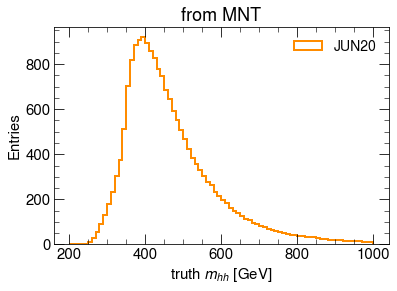

In [39]:
plt.hist(mHH_jun*0.001,80,(200,1000),histtype='step',lw=2,
         label='JUN20',color='darkorange',
         weights=w_jun)


plt.xlabel('truth $m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('from MNT')
plt.show()

In [40]:
mHH_jun

array([434948.64889295, 382684.79341203, 435242.4824476 , ...,
       609044.5808677 , 486261.42997119, 642220.44267578])

In [41]:
mc16a_apr = '../../public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root'

f_apr = uproot.open(mc16a_apr)
t_apr = f_apr['XhhMiniNtuple']
w_apr = t_apr.array('mcEventWeight')

df_apr = pd.DataFrame()
truthInfo(t_apr, df_apr)

Retriving truth id
Getting the b-quark parent's barcodes



KeyboardInterrupt



In [ ]:
plt.hist(mHH_jun*0.001,80,(200,1000),histtype='step',lw=2,
         label='JUN20',color='darkorange',
         weights=w_jun)
plt.hist(df_apr.truth_mhh,80,(200,1000),histtype='step',lw=2,
         label='APR20',color='orangered',ls='--',
         weights=w_apr)


plt.xlabel('truth $m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('from MNT')
plt.show()

But, this is good that they're matching up @ the MNT level now!!

In [42]:
key = f'{physicsSample}_mc16a-JUN20'
sample_jun = normalizeWeight(None,key,L[16],600043)

/gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_FullTop.MC16a-2015-2016.AB21.2.91-JUN20-1.full_MiniNTuple.root/user.valentem.22740909._000001.MiniNTuple.root
sum_weights_initial 26760.097015455365
Reading entry for DSID 600043:
  xsec 27.900000000000002
  k_factor 1.1129
  gen_filter_eff 0.3392
  sample_weight 0.009681967328502648


In [ ]:
sample_jun

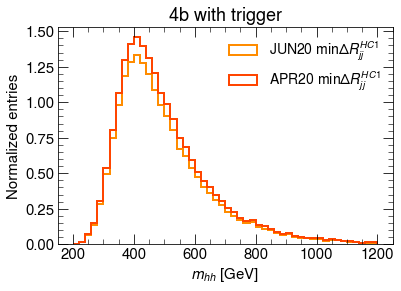

In [43]:
plt.hist(df2.loc[df2.ntag >=4,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='JUN20 $\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=sample_jun*df2.loc[df2.ntag >=4,'mc_sf'])
plt.hist(dr1.loc[dr1.ntag>=4,'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='APR20 $\min \Delta R_{jj}^{HC1}$',color='orangered',
         weights=dr1.loc[dr1.ntag>=4,'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Normalized entries')
plt.legend()
plt.title('4b with trigger')
plt.show()

In [ ]:
print('Jun',np.sum(sample_jun*df2.loc[df2.ntag >=4,'mc_sf']))
print('Apr',np.sum(dr1.loc[dr1.ntag>=4,'mc_sf']))

In [ ]:
print('Jun',np.sum(df2.ntag >=4))
print('Apr',np.sum(dr1.ntag>=4))

In [ ]:
evt_jun = df2.loc[(df2.ntag >=4)&df2.trigger,'eventNumber']
evt_apr = dr1.loc[dr1.ntag>=4,'eventNumber']

In [ ]:
evt_jun

In [ ]:
evt_apr

In [ ]:
len(evt_jun)

In [ ]:
len(evt_apr)

In [ ]:
extra_apr = [e for e in evt_apr.values if e not in evt_jun.values]
extra_jun = [e for e in evt_jun.values if e not in evt_apr.values]

In [ ]:
print(len(extra_apr))
print(len(extra_jun))

In [ ]:
extra_apr

In [ ]:
idx_extra = [dr1[dr1.eventNumber==extra_apr[i]].index[0] for i in range(10)]

In [ ]:
for c in dr1.columns:
    print(c)

In [ ]:
from utils import triggers

In [ ]:
cols = ['nresolvedJets','X_wt','trigger','eventNumber','njets',
        'ntag','ntag_all','goodJets','lead_pt','j3_pt','j3_eta','j3_Db']
cols += triggers[2016]
dr1.loc[idx_extra,cols]

In [ ]:
chk = [df2[df2.eventNumber==extra_apr[i]].index[0] for i in range(10)]

In [ ]:
for c in df2.columns:
    print(c)

In [ ]:
cols = ['rand_run_nr','nresolvedJets','X_wt','trigger','eventNumber','njets',
        'ntag','goodJets','lead_pt','j3_pt','j3_eta','j3_Db']
cols += triggers[2016]

df2.loc[chk,cols]

In [ ]:
np.min(dr1.loc[dr1.trigger,'rand_run_nr']), np.max(dr1.loc[dr1.trigger,'rand_run_nr'])

In [ ]:
np.min(df2.loc[df2.trigger,'rand_run_nr']), np.max(df2.loc[df2.trigger,'rand_run_nr'])

So - if I apply the right mask for APR20, will they match up appropriately?

In [46]:
rrn_min = 296939

In [45]:
L_scale = (L[15]+L[16])/L[16]

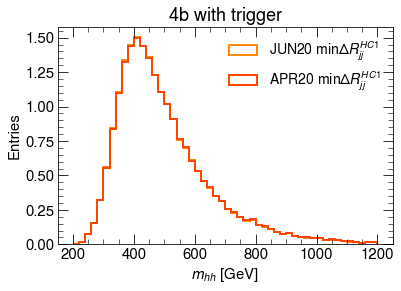

In [47]:
plt.hist(df2.loc[(df2.ntag >=4) & (df2.trigger),'m_hh'],
         50,(200,1200),histtype='step',lw=2,
         label='JUN20 $\min \Delta R_{jj}^{HC1}$',color='darkorange',
         weights=L_scale*sample_jun*df2.loc[(df2.ntag >=4) & (df2.trigger),'mc_sf'])
plt.hist(dr1.loc[(dr1.ntag>=4) & (dr1.rand_run_nr>rrn_min),'m_hh'],50,(200,1200),histtype='step',lw=2,
         label='APR20 $\min \Delta R_{jj}^{HC1}$',color='orangered',
         weights=L_scale*dr1.loc[(dr1.ntag>=4) & (dr1.rand_run_nr>rrn_min),'mc_sf'])

plt.xlabel('$m_{hh}$ [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('4b with trigger')
plt.show()

In [ ]:
print('Jun',np.sum(L_scale*sample_jun*df2.loc[(df2.ntag >=4) & (df2.trigger),'mc_sf']))
print('Apr',np.sum(L_scale*dr1.loc[(dr1.ntag>=4) & (dr1.rand_run_nr>rrn_min),'mc_sf']))

In [ ]:
jcols = [f'j{ji}_{v}' for ji in range(4) for v in ['pt','Db']]
jcols

In [ ]:
df2.loc[(df2.ntag >=4) & (df2.trigger),['m_hh','ntag']+jcols]

In [ ]:
dr1.loc[(dr1.ntag>=4) & (dr1.rand_run_nr>rrn_min),['m_hh','ntag_all']+jcols]